<h1>Josh Vrylle V. Castillo</h1>
<h1>Marc Lester C. Hernandez</h1>
<h1>BSIT-3A</h1>
<h1>ITD</h1>


<h3>Importing Libraries:</h3>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pandas.plotting import parallel_coordinates

In [2]:
family = pd.read_csv('dataset/Family Income and Expenditure.csv')

In [3]:
family['Region']

0                       CAR
1                       CAR
2                       CAR
3                       CAR
4                       CAR
                ...        
41539    XII - SOCCSKSARGEN
41540    XII - SOCCSKSARGEN
41541    XII - SOCCSKSARGEN
41542    XII - SOCCSKSARGEN
41543    XII - SOCCSKSARGEN
Name: Region, Length: 41544, dtype: object

In [4]:
family.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [5]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [6]:
family.count()

Total Household Income                           41544
Region                                           41544
Total Food Expenditure                           41544
Main Source of Income                            41544
Agricultural Household indicator                 41544
Bread and Cereals Expenditure                    41544
Total Rice Expenditure                           41544
Meat Expenditure                                 41544
Total Fish and  marine products Expenditure      41544
Fruit Expenditure                                41544
Vegetables Expenditure                           41544
Restaurant and hotels Expenditure                41544
Alcoholic Beverages Expenditure                  41544
Tobacco Expenditure                              41544
Clothing, Footwear and Other Wear Expenditure    41544
Housing and water Expenditure                    41544
Imputed House Rental Value                       41544
Medical Care Expenditure                         41544
Transporta

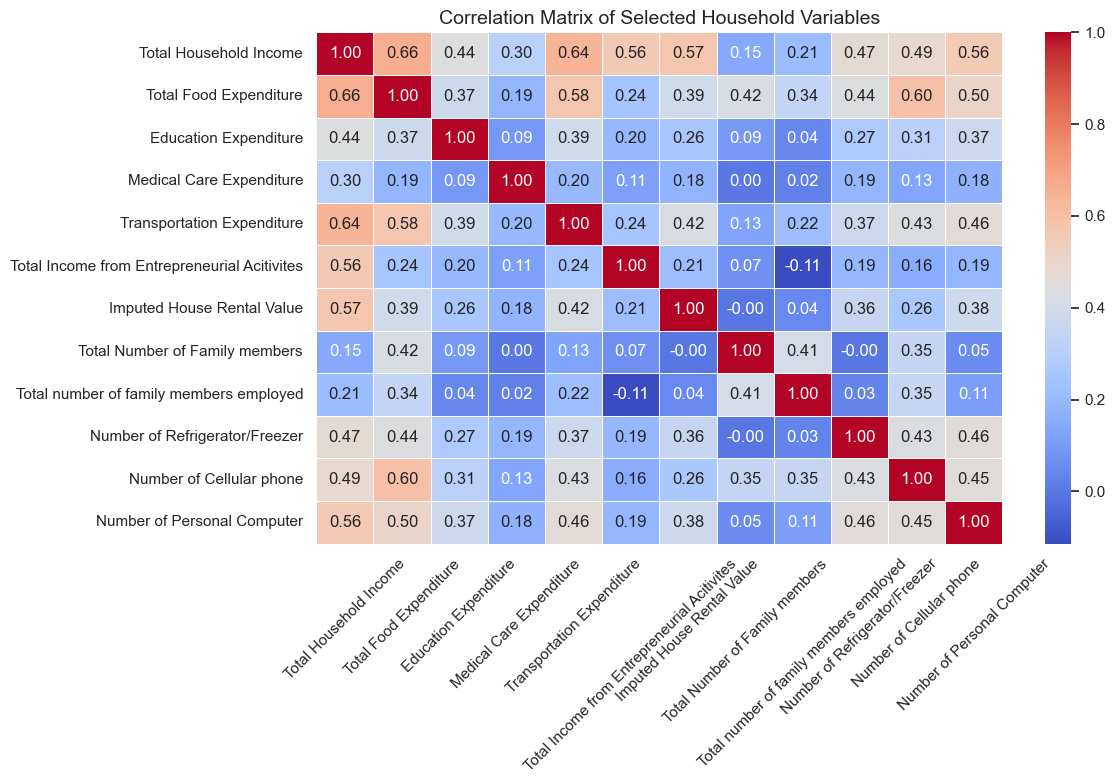

Total Household Income  Total Food Expenditure        0.663660
                        Transportation Expenditure    0.639939
Total Food Expenditure  Number of Cellular phone      0.597036
                        Transportation Expenditure    0.577372
Total Household Income  Imputed House Rental Value    0.574091
dtype: float64


In [7]:
# Set seaborn theme
sns.set(style="whitegrid")

# Step 1: Choose key numeric variables for correlation analysis
num_cols = [
    'Total Household Income',
    'Total Food Expenditure',
    'Education Expenditure',
    'Medical Care Expenditure',
    'Transportation Expenditure',
    'Total Income from Entrepreneurial Acitivites',
    'Imputed House Rental Value',
    'Total Number of Family members',
    'Total number of family members employed',
    'Number of Refrigerator/Freezer',
    'Number of Cellular phone',
    'Number of Personal Computer'
]

# Step 2: Compute correlation matrix
corr_matrix = family[num_cols].corr()

# Step 3: Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Selected Household Variables", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 4: Extract top 5 strongest non-trivial correlations (excluding perfect self-correlation)
corr_pairs = corr_matrix.unstack()
strong_corrs = corr_pairs[(abs(corr_pairs) > 0.5) & (abs(corr_pairs) < 1.0)]
strong_corrs = strong_corrs.drop_duplicates().sort_values(ascending=False).head(5)

# Display top correlated variable pairs
print(strong_corrs)

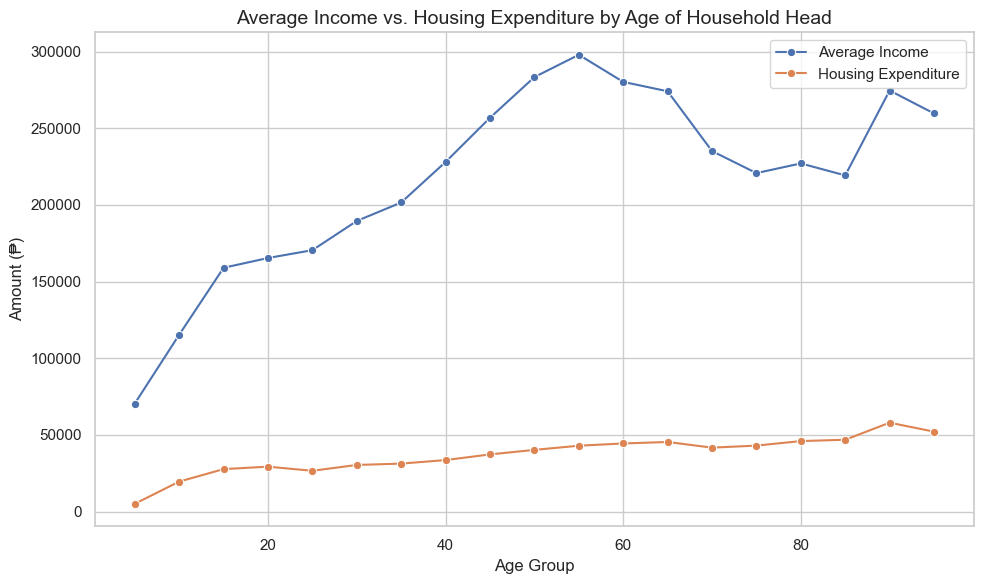

In [ ]:


# Step 1: Select needed columns and drop rows with missing values
family = family[['Household Head Age', 'Total Household Income', 'Housing and water Expenditure']].dropna()

# Step 2: Round age into 5-year bins for smoother trends
family['Age Group'] = (family['Household Head Age'] // 5) * 5

# Step 3: Group by Age Group and calculate average income and expenditure
grouped = family.groupby('Age Group')[['Total Household Income', 'Housing and water Expenditure']].mean().reset_index()

# Step 4: Plot the line graph
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Income trend
sns.lineplot(data=grouped, x='Age Group', y='Total Household Income', label='Average Income', marker='o', color='#4c72b0')

# Housing expenditure trend
sns.lineplot(data=grouped, x='Age Group', y='Housing and water Expenditure', label='Housing Expenditure', marker='o', color='#dd8452')

# Step 5: Labels and formatting
plt.title('Average Income vs. Housing Expenditure by Age of Household Head', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Amount (₱)')
plt.legend()
plt.tight_layout()
plt.show()


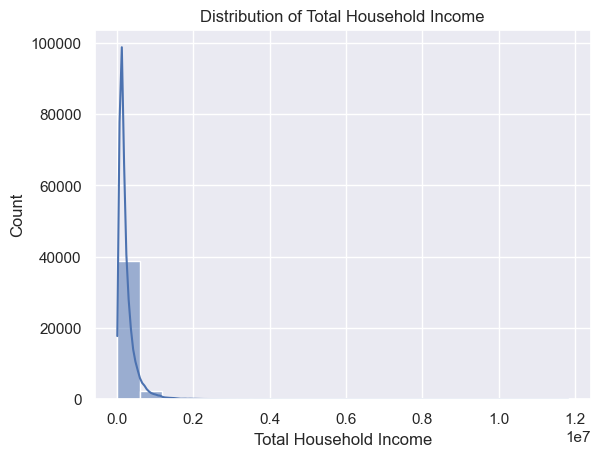

In [ ]:
sns.set_theme()

plt.figure()
sns.histplot(family['Total Household Income'], bins=20, kde=True)
plt.title('Distribution of Total Household Income')
plt.xlabel('Total Household Income')
plt.ylabel('Count')
plt.show()



<h1> Distribution of Total Household Income</h1>

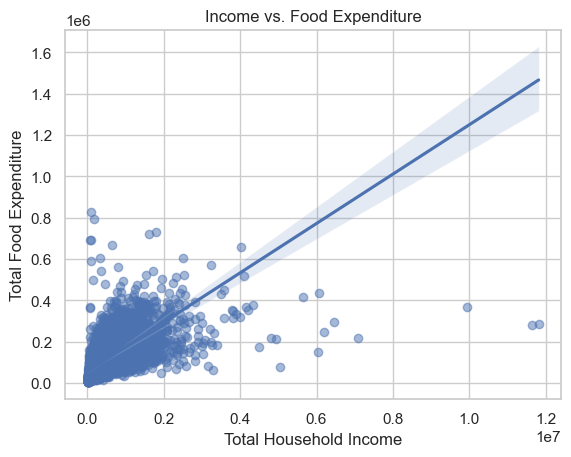

In [55]:
plt.figure()
sns.regplot(x='Total Household Income', y='Total Food Expenditure', data=family, scatter_kws={'alpha':0.5})
plt.title('Income vs. Food Expenditure')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.show()


<h1> Income vs Food Expenditure</h1>
<h2> Regression line </h2>

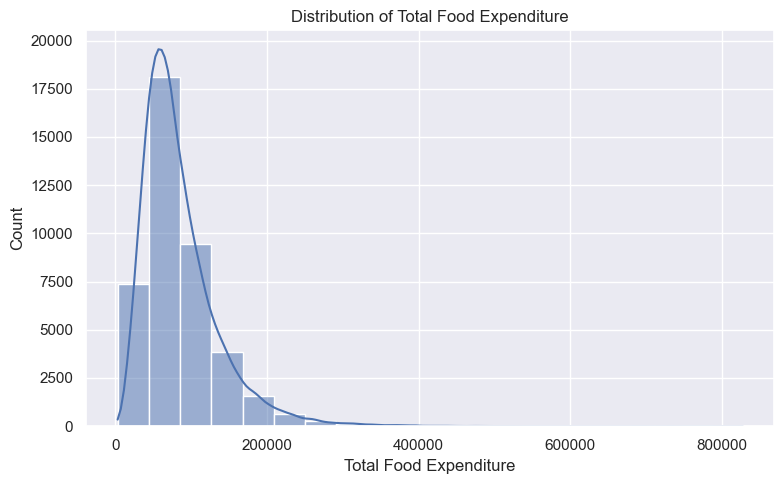

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(family['Total Food Expenditure'], bins=20, kde=True)
plt.title('Distribution of Total Food Expenditure')
plt.xlabel('Total Food Expenditure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


<h1>Food Expenditure by Region </h1>

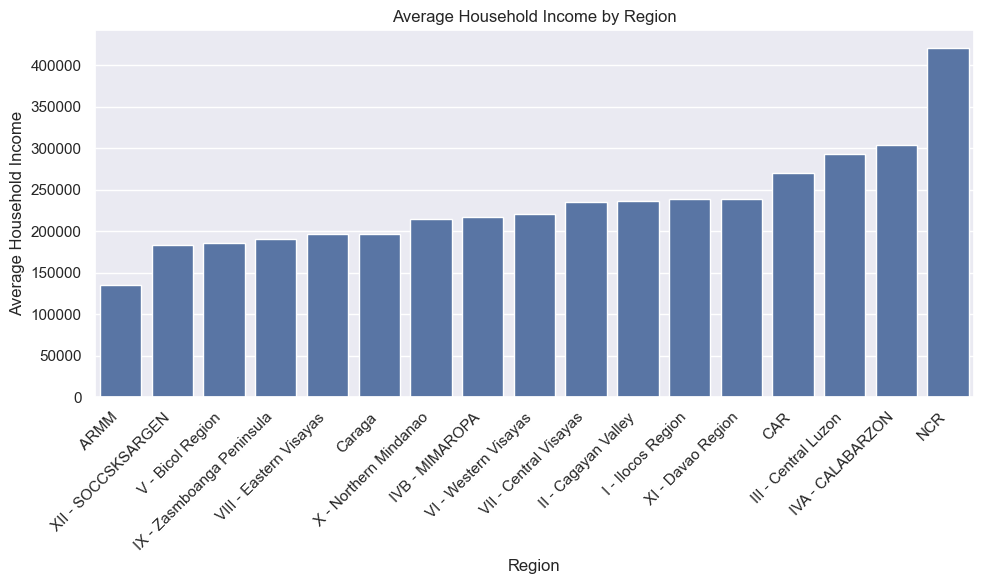

In [12]:
avg_income = family.groupby('Region')['Total Household Income'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Total Household Income', data=avg_income, order=avg_income.sort_values('Total Household Income')['Region'])
plt.title('Average Household Income by Region')
plt.xlabel('Region')
plt.ylabel('Average Household Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<h1> Counts of Main Source of Income </h1>

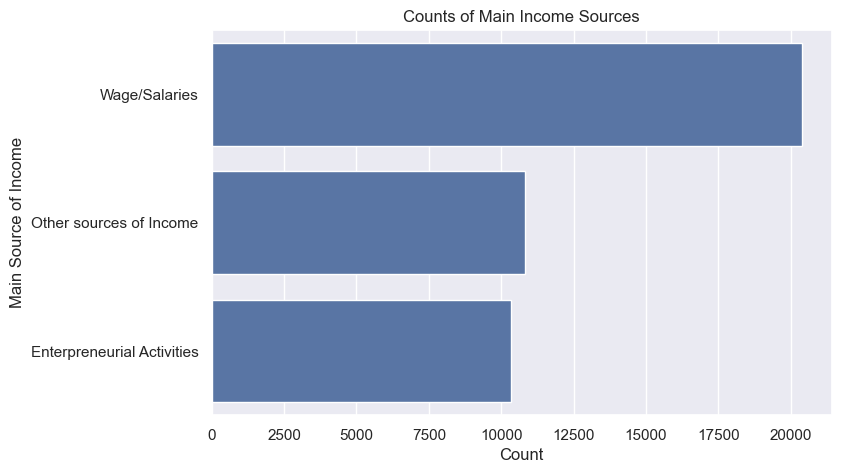

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(y='Main Source of Income', data=family, order=family['Main Source of Income'].value_counts().index)
plt.title('Counts of Main Income Sources')
plt.xlabel('Count')
plt.ylabel('Main Source of Income')
plt.show()


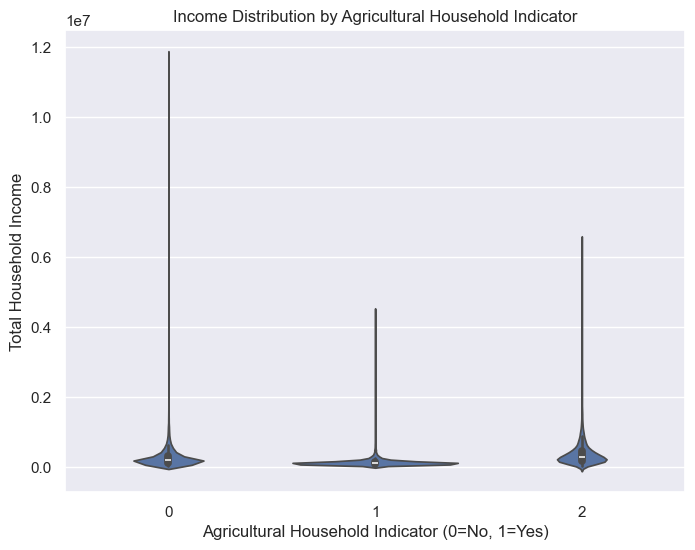

In [14]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Agricultural Household indicator', y='Total Household Income', data=family)
plt.title('Income Distribution by Agricultural Household Indicator')
plt.xlabel('Agricultural Household Indicator (0=No, 1=Yes)')
plt.ylabel('Total Household Income')
plt.show()


In [15]:
# RADAR CHART / FUNNEL CHART / SCATTER CHART

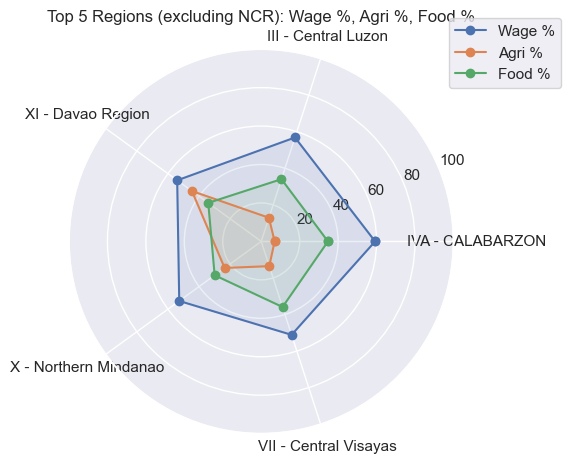

In [18]:
group = family.groupby('Region')
wage_pct = group.apply(lambda g: (g['Main Source of Income'] == 'Wage/Salaries').mean() * 100)
ag_pct   = group['Agricultural Household indicator'].mean() * 100
avg_inc  = group['Total Household Income'].mean()
avg_exp  = group['Total Food Expenditure'].mean()
food_pct = (avg_exp / avg_inc) * 100

metrics = pd.DataFrame({
    'WagePct': wage_pct,
    'AgriPct': ag_pct,
    'FoodPct': food_pct
})

# Exclude NCR to avoid its outlier effect
metrics = metrics.drop(index='NCR', errors='ignore')

# Select top 5 regions by WagePct (excluding NCR)
top5 = metrics.sort_values('WagePct', ascending=False).head(5)

# Prepare for radar
labels = top5.index.tolist()
num = len(labels)
angles = np.linspace(0, 2*np.pi, num, endpoint=False).tolist()
angles += angles[:1]

def wrap(vals):
    return vals.tolist() + [vals.iloc[0]]

w_vals = wrap(top5['WagePct'])
a_vals = wrap(top5['AgriPct'])
f_vals = wrap(top5['FoodPct'])

# Plot
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(6,6))
ax.plot(angles, w_vals, marker='o', label='Wage %')
ax.fill(angles, w_vals, alpha=0.1)
ax.plot(angles, a_vals, marker='o', label='Agri %')
ax.fill(angles, a_vals, alpha=0.1)
ax.plot(angles, f_vals, marker='o', label='Food %')
ax.fill(angles, f_vals, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Top 5 Regions (excluding NCR): Wage %, Agri %, Food %')
ax.set_ylim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()



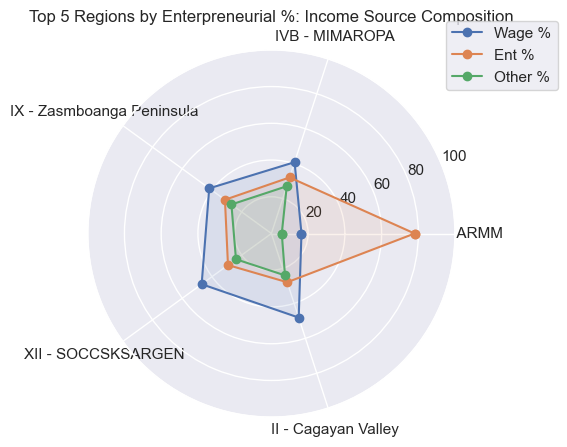

In [21]:
def wrap(vals):
    lst = vals.tolist()
    lst.append(lst[0])
    return lst

source_ct = pd.crosstab(family['Region'], family['Main Source of Income'])
source_pct = source_ct.div(source_ct.sum(axis=1), axis=0) * 100

cols = list(source_pct.columns)
wage_col = next(c for c in cols if 'Wage' in c)
ent_col = next(c for c in cols if 'Enterpr' in c)  # matches 'Enterpreneurial Activities'
other_cols = [c for c in cols if c not in [wage_col, ent_col]]

pcts = pd.DataFrame({
    'WagePct': source_pct[wage_col],
    'EntPct': source_pct[ent_col],
    'OtherPct': source_pct[other_cols].sum(axis=1)
})
top_ent = pcts.sort_values('EntPct', ascending=False).head(5)
labels1 = top_ent.index.tolist()
angles1 = np.linspace(0, 2*np.pi, len(labels1), endpoint=False).tolist()
angles1 += angles1[:1]

top_ent = pcts.sort_values('EntPct', ascending=False).head(5)
labels1 = top_ent.index.tolist()
angles1 = np.linspace(0, 2*np.pi, len(labels1), endpoint=False).tolist()
angles1 += angles1[:1]

w1 = wrap(top_ent['WagePct'])
e1 = wrap(top_ent['EntPct'])
o1 = wrap(top_ent['OtherPct'])
fig1, ax1 = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax1.plot(angles1, w1, marker='o', label='Wage %')
ax1.fill(angles1, w1, alpha=0.1)
ax1.plot(angles1, e1, marker='o', label='Ent %')
ax1.fill(angles1, e1, alpha=0.1)
ax1.plot(angles1, o1, marker='o', label='Other %')
ax1.fill(angles1, o1, alpha=0.1)
ax1.set_xticks(angles1[:-1])
ax1.set_xticklabels(labels1)
ax1.set_ylim(0, 100)
ax1.set_title('Top 5 Regions by Enterpreneurial %: Income Source Composition')
ax1.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

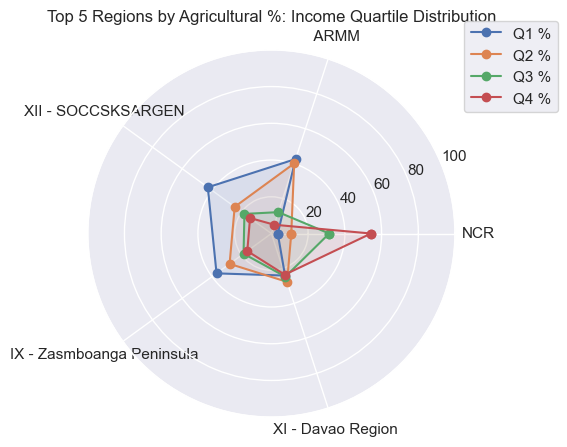

In [22]:
family['IncomeQuartile'] = pd.qcut(family['Total Household Income'], 4, labels=['Q1','Q2','Q3','Q4'])
quart_ct = pd.crosstab(family['Region'], family['IncomeQuartile'])
quart_pct = quart_ct.div(quart_ct.sum(axis=1), axis=0) * 100

# Compute AgriPct
agri_pct = family.groupby('Region')['Agricultural Household indicator'].mean() * 100
quart_pct['AgriPct'] = agri_pct

# Select top 5 by AgriPct
top_agri = quart_pct.sort_values('AgriPct', ascending=False).head(5)[['Q1','Q2','Q3','Q4']]
labels2 = top_agri.index.tolist()
angles2 = np.linspace(0, 2*np.pi, len(labels2), endpoint=False).tolist()
angles2 += angles2[:1]

# Wrap quartile values
values2 = {q: wrap(top_agri[q]) for q in ['Q1','Q2','Q3','Q4']}

fig2, ax2 = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for q, v in values2.items():
    ax2.plot(angles2, v, marker='o', label=f'{q} %')
    ax2.fill(angles2, v, alpha=0.1)
ax2.set_xticks(angles2[:-1])
ax2.set_xticklabels(labels2)
ax2.set_ylim(0, 100)
ax2.set_title('Top 5 Regions by Agricultural %: Income Quartile Distribution')
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


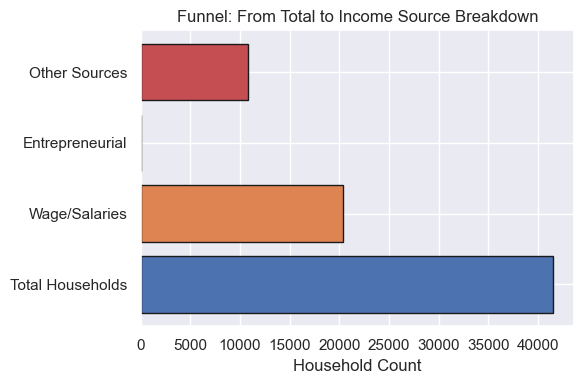

In [24]:
stages = {
    'Total Households': len(family),
    'Wage/Salaries':   (family['Main Source of Income']=='Wage/Salaries').sum(),
    'Entrepreneurial':  (family['Main Source of Income']=='Entrepreneurial Activities').sum(),
    'Other Sources':    (family['Main Source of Income']=='Other sources of Income').sum()
}

# Funnel plotting
labels = list(stages.keys())
values = list(stages.values())
widths = values  # width proportional to count
y = range(len(values), 0, -1)

plt.figure(figsize=(6,4))
for i, (w, yi) in enumerate(zip(widths, y)):
    plt.barh(yi, w, height=0.8, color=f"C{i}", edgecolor="k")
    
plt.yticks(y, labels)
plt.xlabel('Household Count')
plt.title('Funnel: From Total to Income Source Breakdown')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


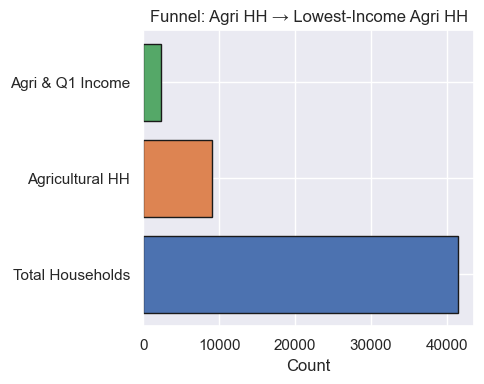

In [26]:
total = len(family)
agri  = (family['Agricultural Household indicator']==1).sum()
low_agri = family[family['Agricultural Household indicator']==1]
low_q1   = (low_agri['Total Household Income'] <= low_agri['Total Household Income'].quantile(0.25)).sum()

stages = {
    'Total Households': total,
    'Agricultural HH':  agri,
    'Agri & Q1 Income': low_q1
}

labels = list(stages.keys())
values = list(stages.values())
y = range(len(values), 0, -1)

plt.figure(figsize=(5,4))
for i, (v, yi) in enumerate(zip(values, y)):
    plt.barh(yi, v, height=0.8, color=f"C{i}", edgecolor="k")

plt.yticks(y, labels)
plt.xlabel('Count')
plt.title('Funnel: Agri HH → Lowest-Income Agri HH')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


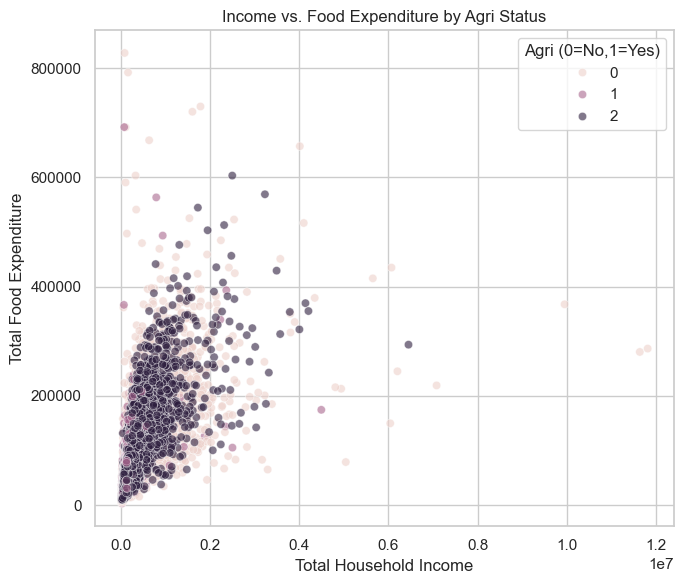

In [29]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=family,
    x='Total Household Income',
    y='Total Food Expenditure',
    hue='Agricultural Household indicator',
    alpha=0.6
)
plt.title('Income vs. Food Expenditure by Agri Status')
plt.xlabel('Total Household Income')
plt.ylabel('Total Food Expenditure')
plt.legend(title='Agri (0=No,1=Yes)')
plt.tight_layout()
plt.show()

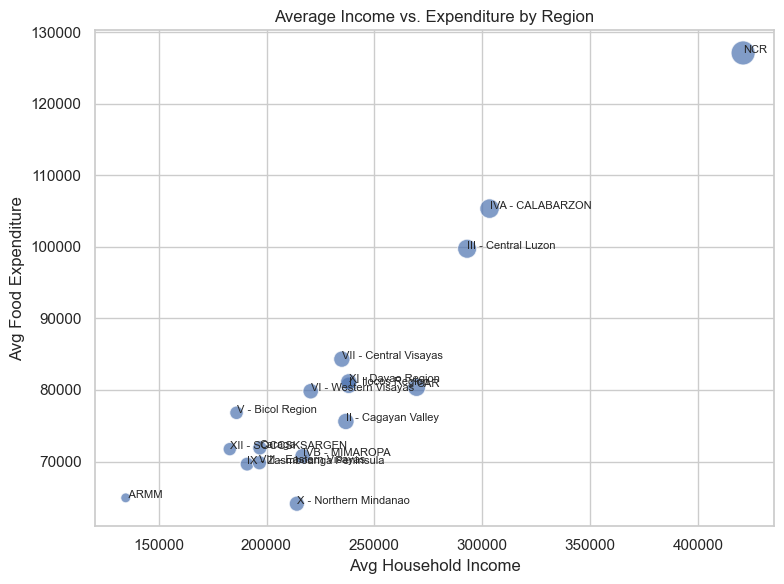

In [30]:
agg = family.groupby('Region').agg(
    AvgIncome=('Total Household Income','mean'),
    AvgExpend=('Total Food Expenditure','mean')
).reset_index()

# Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=agg,
    x='AvgIncome',
    y='AvgExpend',
    size='AvgIncome',
    sizes=(50,300),
    legend=False,
    alpha=0.7
)
for _, row in agg.iterrows():
    plt.text(row['AvgIncome'], row['AvgExpend'], row['Region'], fontsize=8)

plt.title('Average Income vs. Expenditure by Region')
plt.xlabel('Avg Household Income')
plt.ylabel('Avg Food Expenditure')
plt.tight_layout()
plt.show()


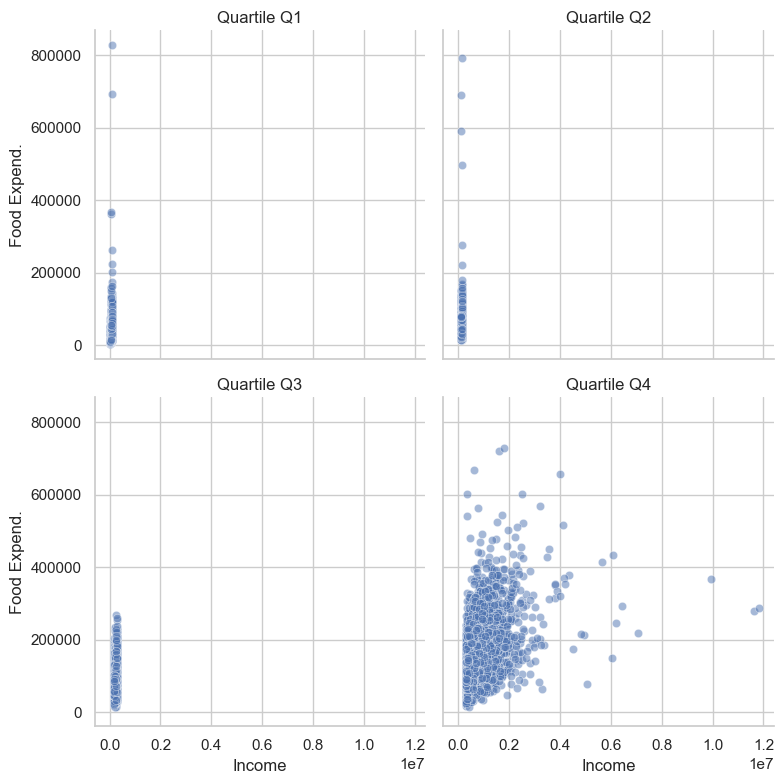

In [31]:
family['IncomeQuartile'] = pd.qcut(family['Total Household Income'], 4, labels=['Q1','Q2','Q3','Q4'])

# Faceted scatter
g = sns.FacetGrid(family, col='IncomeQuartile', col_wrap=2, height=4)
g.map_dataframe(
    sns.scatterplot,
    x='Total Household Income',
    y='Total Food Expenditure',
    alpha=0.5
)
g.set_axis_labels("Income", "Food Expend.")
g.set_titles("Quartile {col_name}")
plt.tight_layout()
plt.show()


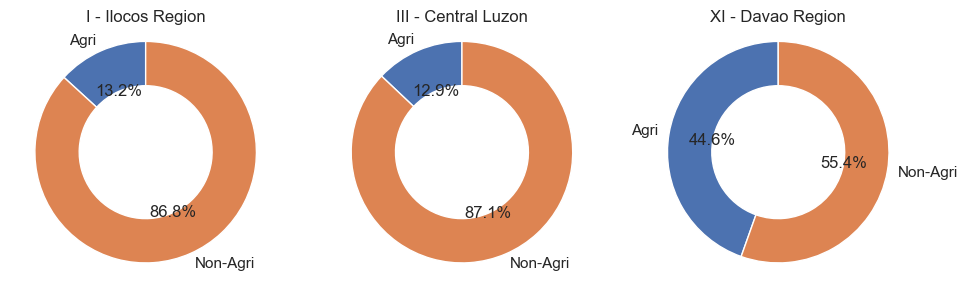

In [33]:
regions = ['I - Ilocos Region', 'III - Central Luzon', 'XI - Davao Region']
data = {}
for r in regions:
    sub = family[family.Region == r]
    ag = sub['Agricultural Household indicator'].mean() * 100
    data[r] = [ag, 100-ag]

plt.figure(figsize=(10,3))
for i,(r,vals) in enumerate(data.items()):
    plt.subplot(1,3,i+1)
    plt.pie(vals, labels=['Agri','Non-Agri'], startangle=90,
            wedgeprops=dict(width=0.4), autopct='%1.1f%%')
    plt.title(r)
    plt.axis('equal')
plt.tight_layout()
plt.show()


<h3> Inner ring = overall income‐source share; outer ring = how that source splits into Agri/Non-Agri households.</h3>

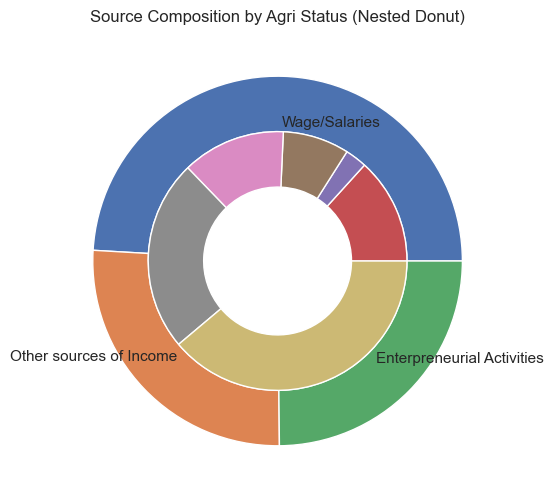

In [37]:
src_counts = family['Main Source of Income'].value_counts()

# 2. Breakdown of each source by Agri status
breakdown = family.groupby(['Main Source of Income','Agricultural Household indicator']) \
              .size() \
              .unstack(fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(6,6))
# inner ring
wedges1, _ = ax.pie(src_counts, radius=1.0, labels=src_counts.index,
                    labeldistance=0.75, wedgeprops=dict(width=0.3))
# outer ring
labels2 = ['{}-Ag'.format(i) for i in breakdown.index] + ['{}-Non'.format(i) for i in breakdown.index]
sizes2 = list(breakdown[1]) + list(breakdown[0])
wedges2, _ = ax.pie(sizes2, radius=1.0-0.3, labels=None,
                    wedgeprops=dict(width=0.3))
ax.set(aspect="equal", title='Source Composition by Agri Status (Nested Donut)')
plt.show()


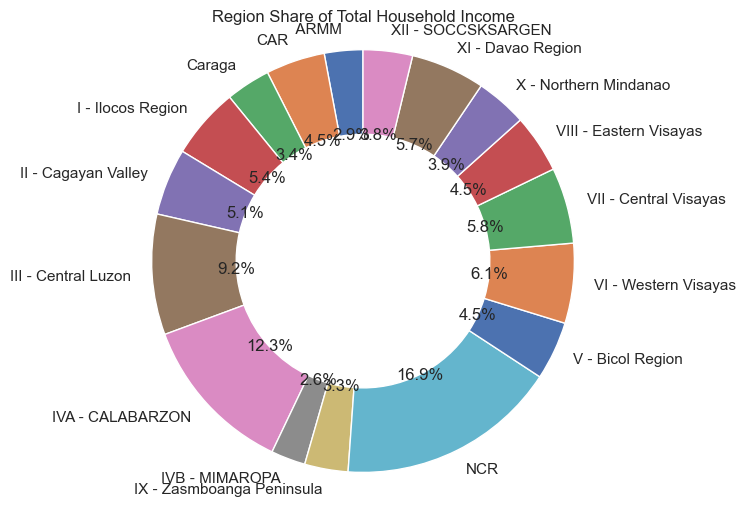

In [39]:
income_by_region = family.groupby('Region')['Total Household Income'].sum()
shares = income_by_region / income_by_region.sum() * 100

plt.figure(figsize=(6,6))
plt.pie(shares, labels=shares.index, startangle=90,
        wedgeprops=dict(width=0.4), autopct='%1.1f%%')
plt.title('Region Share of Total Household Income')
plt.axis('equal')
plt.show()


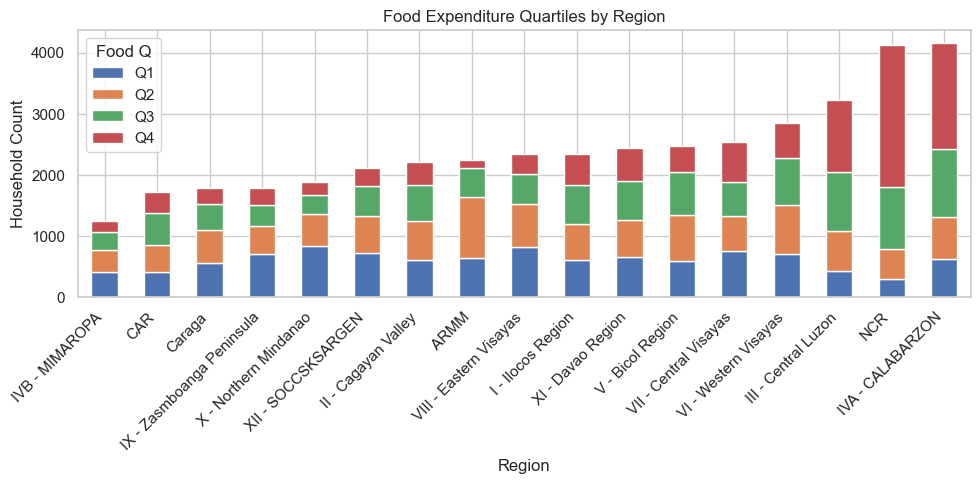

In [36]:
family['FoodQuartile'] = pd.qcut(family['Total Food Expenditure'], 4, labels=['Q1','Q2','Q3','Q4'])
ct = pd.crosstab(family['Region'], family['FoodQuartile'])
ct = ct.loc[ct.sum(axis=1).sort_values().index]

ct.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Food Expenditure Quartiles by Region')
plt.xlabel('Region')
plt.ylabel('Household Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Food Q')
plt.tight_layout()
plt.show()

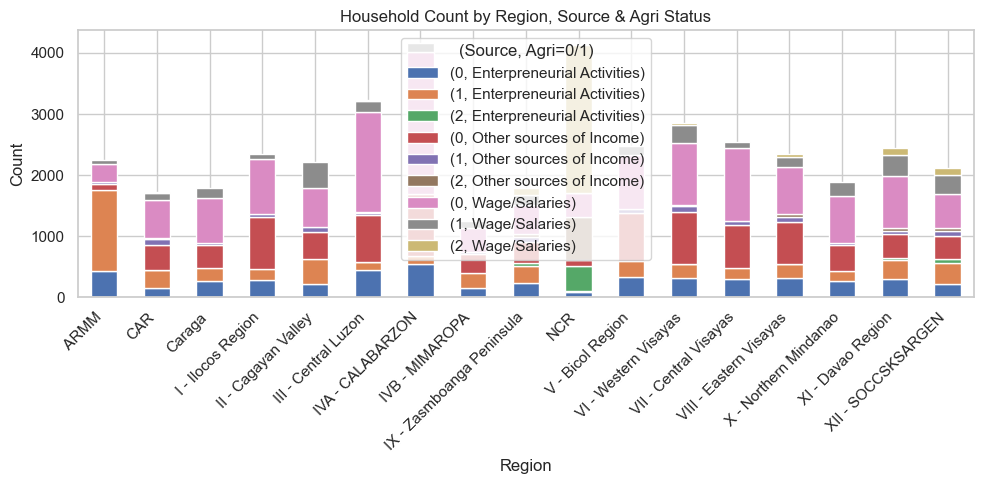

In [41]:
ct = pd.crosstab(
    [family['Region'], family['Main Source of Income']],
    family['Agricultural Household indicator']
).unstack(fill_value=0).stack(level=0)  # shape: Region×Source × Agri

# pivot for plotting
plot_family = ct.unstack().swaplevel(0,1,axis=1)
plot_family.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Household Count by Region, Source & Agri Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='(Source, Agri=0/1)')
plt.tight_layout()
plt.show()


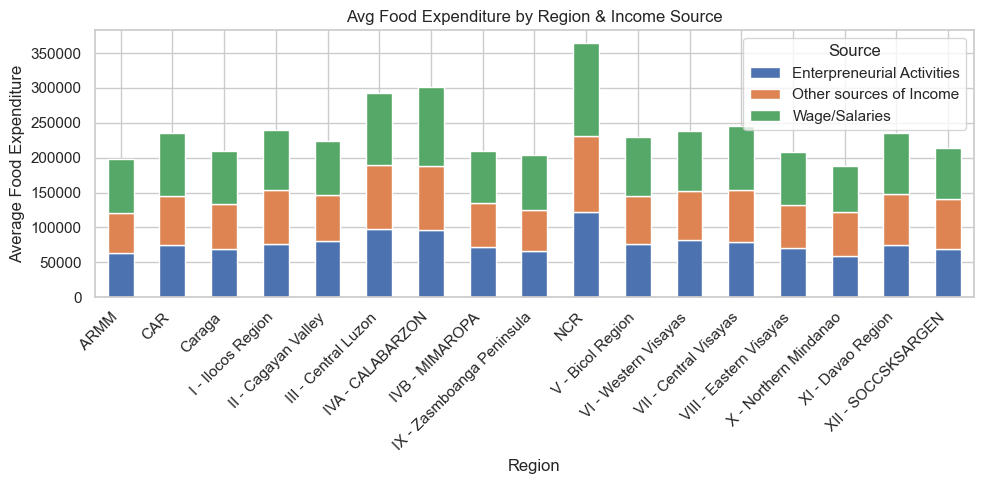

In [42]:
avg_exp = family.groupby(['Region','Main Source of Income'])['Total Food Expenditure'] \
            .mean().unstack(fill_value=0)

avg_exp.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Avg Food Expenditure by Region & Income Source')
plt.xlabel('Region')
plt.ylabel('Average Food Expenditure')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source')
plt.tight_layout()
plt.show()


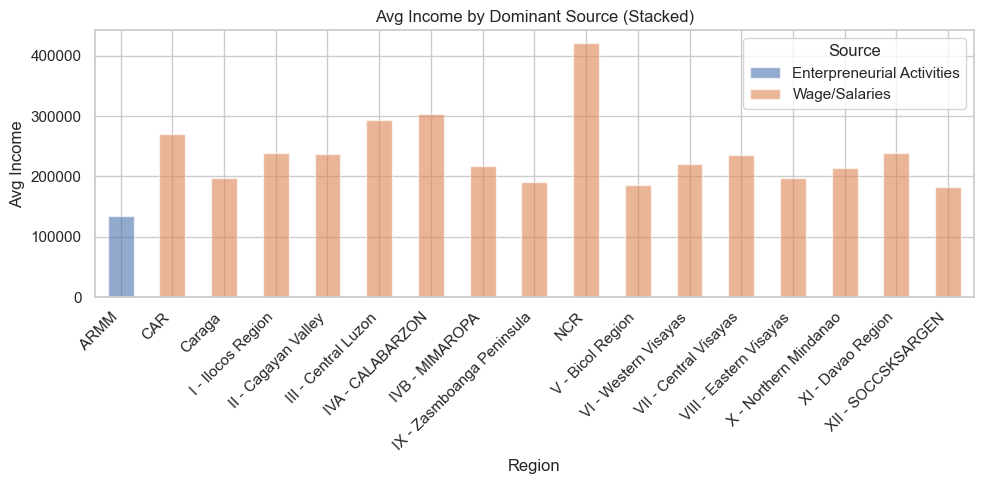

In [43]:
dom = family.groupby('Region')['Main Source of Income'] \
        .agg(lambda s: s.value_counts().idxmax())

# Metrics
metrics = family.groupby('Region').agg(
    AvgIncome=('Total Household Income','mean'),
    AvgFoodExp=('Total Food Expenditure','mean')
)

metrics['DominantSource'] = dom
metrics = metrics.reset_index()

# Prepare for stacked plot
pivot = metrics.pivot(index='Region', columns='DominantSource', values='AvgIncome')
pivot_exp = metrics.pivot(index='Region', columns='DominantSource', values='AvgFoodExp')

# Plot Income
pivot.plot(kind='bar', stacked=True, figsize=(10,5), alpha=0.6)
plt.title('Avg Income by Dominant Source (Stacked)')
plt.xlabel('Region')
plt.ylabel('Avg Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source')
plt.tight_layout()
plt.show()


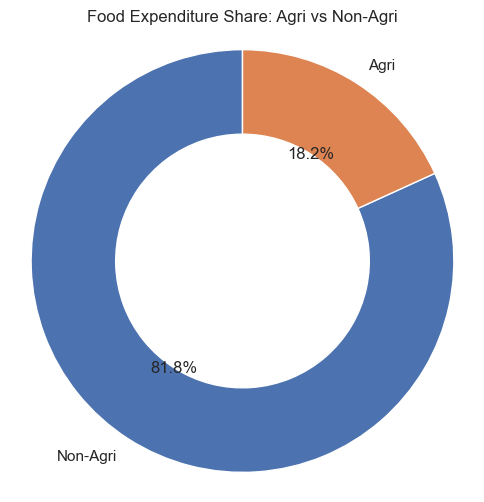

In [ ]:
agg = family.groupby('Agricultural Household indicator')['Total Food Expenditure'].sum()
labels = ['Non-Agri','Agri']
values = [agg[0], agg[1]]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, startangle=90,
        wedgeprops=dict(width=0.4), autopct='%1.1f%%')
plt.title('Food Expenditure Share: Agri vs Non-Agri')
plt.axis('equal')
plt.show()


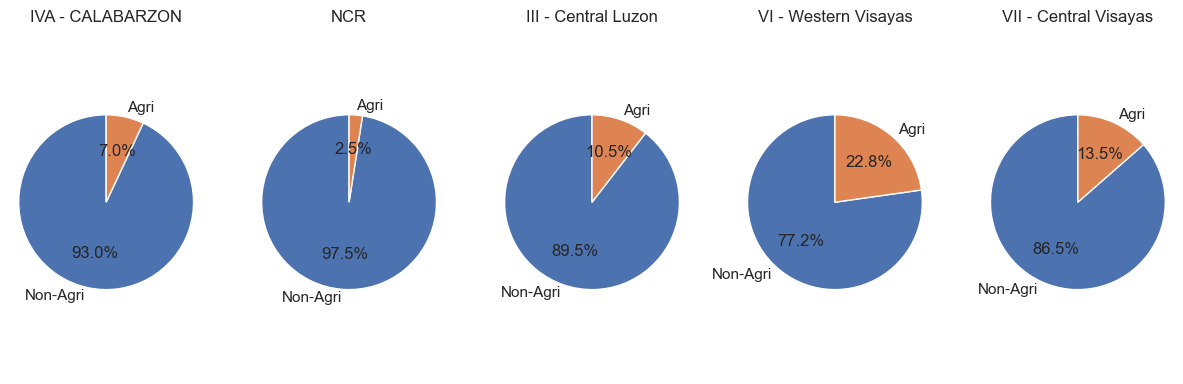

In [44]:
regions = family['Region'].value_counts().head(5).index.tolist()

plt.figure(figsize=(12,4))
for i, r in enumerate(regions):
    sub = family[family['Region']==r]
    counts = sub['Agricultural Household indicator'].map({0:'Non-Agri',1:'Agri'}).value_counts()
    plt.subplot(1,5,i+1)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(r)
    plt.axis('equal')
plt.tight_layout()
plt.show()


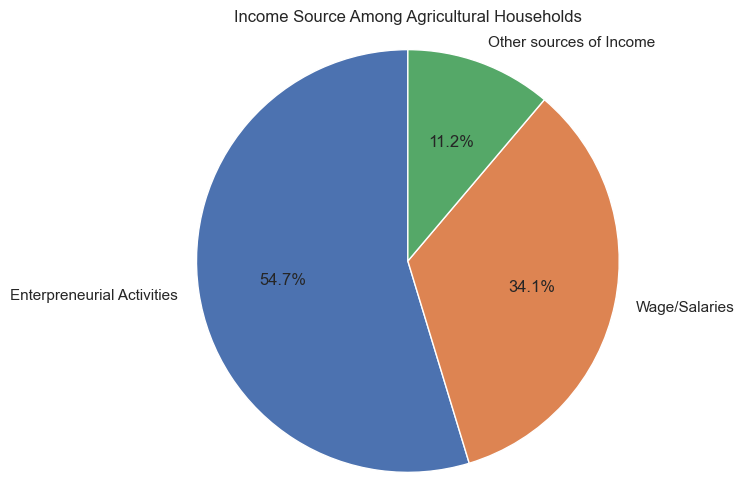

In [46]:
sub = family[family['Agricultural Household indicator']==1]
counts = sub['Main Source of Income'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Income Source Among Agricultural Households')
plt.axis('equal')
plt.show()


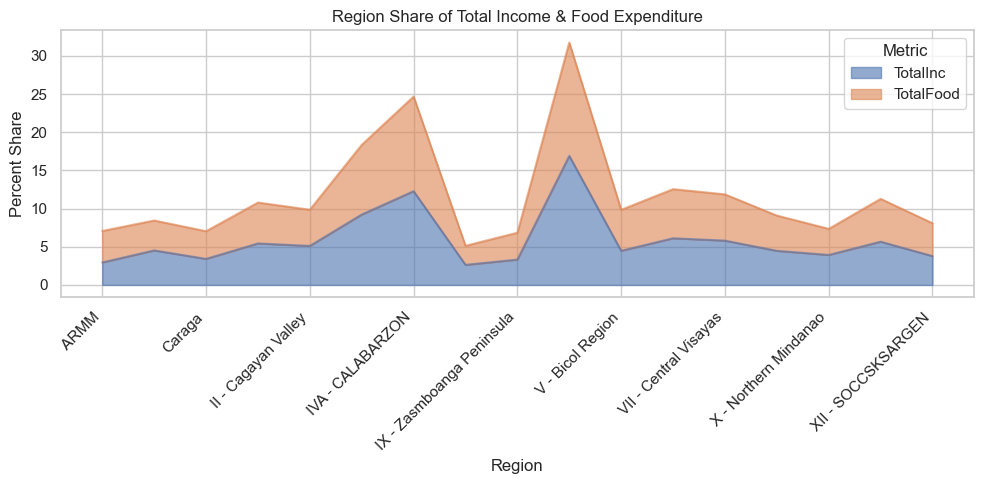

In [47]:
agg = family.groupby('Region').agg(
    TotalInc=('Total Household Income','sum'),
    TotalFood=('Total Food Expenditure','sum')
)
shares = agg.div(agg.sum(axis=0), axis=1) * 100
shares.plot(kind='area', figsize=(10,5), alpha=0.6)
plt.title('Region Share of Total Income & Food Expenditure')
plt.xlabel('Region')
plt.ylabel('Percent Share')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


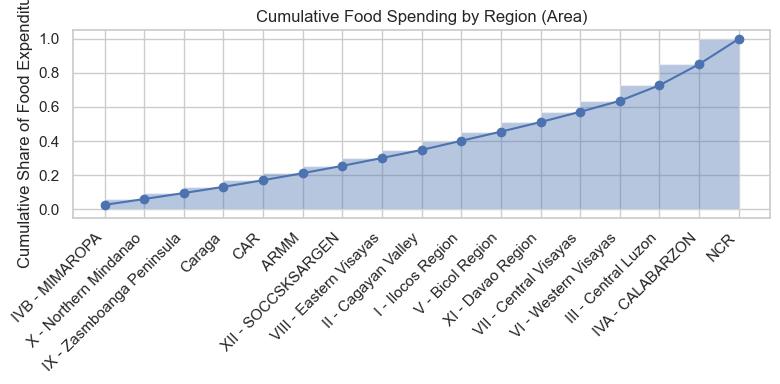

In [50]:
f_by_region = family.groupby('Region')['Total Food Expenditure'].sum().sort_values()
cum = f_by_region.cumsum() / f_by_region.sum()

plt.figure(figsize=(8,4))
plt.fill_between(cum.index, cum, step='pre', alpha=0.4)
plt.plot(cum.index, cum, marker='o')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cumulative Share of Food Expenditure')
plt.title('Cumulative Food Spending by Region (Area)')
plt.tight_layout()
plt.show()


In [52]:
metrics = family.groupby('Region').agg(
    AvgIncome=('Total Household Income','mean'),
    AvgFoodExp=('Total Food Expenditure','mean'),
    AgriPct=('Agricultural Household indicator', 'mean')
).reset_index()
metrics['AgriPct'] *= 100

plt.figure(figsize=(10,6))
parallel_coordinates(metrics, 'Region', cols=['AvgIncome','AvgFoodExp','AgriPct'], alpha=0.8)
plt.title('Parallel Coordinates: Region Metrics Comparison')
plt.ylabel('Value (AvgIncome, AvgFoodExp, Agri% )')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.3,1))
plt.tight_layout()
plt.show()

NameError: name 'parallel_coordinates' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
hoy